In [1022]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

path = "./transactions-ser"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=';')
    df['file'] = f.split('/')[-1]
    all_df.append(df)

data = pd.concat(all_df, ignore_index=True)
merged_df = data.copy()
merged_df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,ancien_code_commune,ancien_nom_commune,id_parcelle,ancien_id_parcelle,numero_volume,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,lot3_surface_carrez,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,file
0,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0065,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB,transactions-ser\76575_000AB.csv
1,2022-360375,2022-04-21,1,Vente,260000.0,26.0,None,RUE DELILLE,582,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0065,None,None,None,None,None,None,None,None,None,None,None,None,0,3,Dépendance,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB,transactions-ser\76575_000AB.csv
2,2021-1180016,2021-05-10,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,40,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0023,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB,transactions-ser\76575_000AB.csv
3,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0012,None,None,None,None,None,None,None,None,None,None,None,None,0,1,Maison,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB,transactions-ser\76575_000AB.csv
4,2021-1177880,2021-01-14,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000AB0012,None,None,None,None,None,None,None,None,None,None,None,None,0,3,Dépendance,NaN,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB,transactions-ser\76575_000AB.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2019-1112209,2019-02-11,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0053,None,None,None,None,None,None,None,None,None,None,None,None,0,4,Local industriel. commercial ou assimilé,11002.0,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW,transactions-ser\76575_000BW.csv
2968,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0002,None,None,None,None,None,None,None,None,None,None,None,None,0,2,Appartement,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW,transactions-ser\76575_000BW.csv
2969,2018-1037104,2018-12-28,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0002,None,None,None,None,None,None,None,None,None,None,None,None,0,4,Local industriel. commercial ou assimilé,1048.0,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW,transactions-ser\76575_000BW.csv
2970,2018-1033451,2018-07-04,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359,76800,76575,Saint-Étienne-du-Rouvray,76,None,None,76575000BW0094,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,NaN,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW,transactions-ser\76575_000BW.csv


In [1023]:
# Récupèrer que les lignes qui contient appartement et maison
df = merged_df[(merged_df.type_local == 'Maison') | (merged_df.type_local == 'Appartement')]

In [1024]:
to_drop = [column for column in df.columns if df[column].nunique() == 1]

df1 = df.drop(columns=to_drop)

In [1025]:
df1=df1.replace(to_replace='None', value=np.nan)

In [1026]:
missing_rate = df1.isna().sum()/df1.shape[0]
missing_rate

id_mutation                     0.000000
date_mutation                   0.000000
numero_disposition              0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.000000
adresse_numero                  0.000677
adresse_suffixe                 0.959405
adresse_nom_voie                0.000000
adresse_code_voie               0.000000
code_postal                     0.000000
id_parcelle                     0.000000
lot1_numero                     0.842355
lot1_surface_carrez             0.905277
lot2_numero                     0.918809
lot2_surface_carrez             0.981732
lot3_numero                     0.973613
lot3_surface_carrez             0.996617
nombre_lots                     0.000000
code_type_local                 0.000000
type_local                      0.000000
surface_reelle_bati             0.000000
nombre_pieces_principales       0.000000
code_nature_culture             0.158322
nature_culture                  0.158322
code_nature_cult

In [1027]:
#Supprimer les colonnes ayant un messing_rate > 0.8
df1.drop(columns=['adresse_suffixe','lot1_numero', 'lot1_surface_carrez', 'lot2_numero','lot2_surface_carrez','lot3_numero','lot3_surface_carrez','code_nature_culture_speciale','nature_culture_speciale'], inplace=True)
#Supprimer les colonnes ayant d'autres colonnes les représentant avec des valeur (int, ....)
df1.drop(columns = ['adresse_nom_voie','nature_culture','file','id_mutation','code_postal','type_local','id_parcelle','adresse_code_voie'], inplace=True)
df1 = df1.dropna() #We can drop all the rows that have NaN, we don't lose a lot of data

,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,surface_terrain,longitude,latitude,section_prefixe
0,2022-04-21,1,Vente,260000.0,26.0,0,1,129.0,4.0,S,351.0,1.071855,49.401886,000AB
2,2021-05-10,1,Vente,160000.0,13.0,0,1,64.0,4.0,S,452.0,1.070963,49.402764,000AB
3,2021-01-14,1,Vente,174000.0,21.0,0,1,64.0,4.0,S,498.0,1.070475,49.403622,000AB
5,2020-03-10,1,Vente,200000.0,2.0,0,2,18.0,1.0,S,105.0,1.074902,49.403036,000AB
7,2019-08-28,1,Vente,180000.0,28.0,0,1,108.0,5.0,S,348.0,1.071647,49.401956,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2017-09-13,1,Vente,145000.0,27.0,0,1,74.0,5.0,S,374.0,1.072432,49.400659,000BV
2949,2017-09-08,1,Vente,262500.0,5.0,0,1,102.0,5.0,S,434.0,1.069653,49.399310,000BV
2950,2017-09-08,1,Vente,130000.0,25.0,0,1,64.0,4.0,S,369.0,1.072534,49.400600,000BV
2951,2017-09-01,1,Vente,189300.0,20.0,0,1,80.0,4.0,S,354.0,1.071759,49.399769,000BV


array([[<AxesSubplot:title={'center':'numero_disposition'}>,
        <AxesSubplot:title={'center':'valeur_fonciere'}>,
        <AxesSubplot:title={'center':'adresse_numero'}>],
       [<AxesSubplot:title={'center':'nombre_lots'}>,
        <AxesSubplot:title={'center':'surface_reelle_bati'}>,
        <AxesSubplot:title={'center':'nombre_pieces_principales'}>],
       [<AxesSubplot:title={'center':'surface_terrain'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>]], dtype=object)

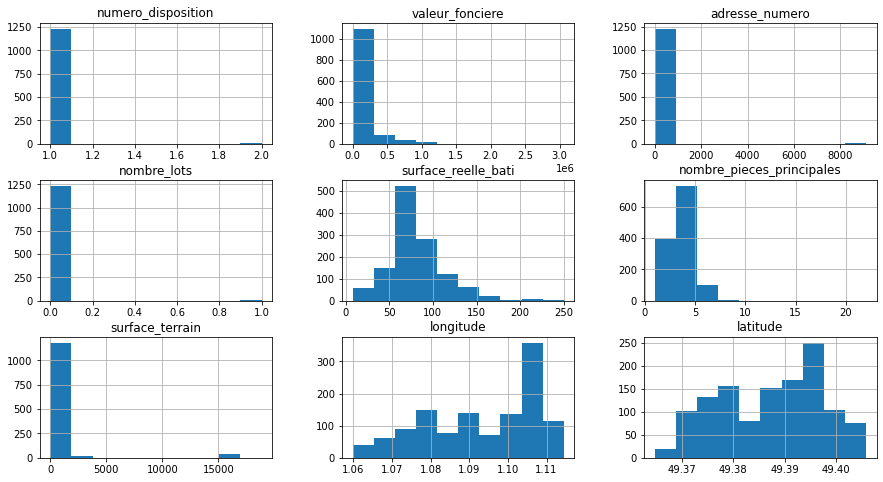

In [1028]:
display(df1)
df1.hist(figsize=(15,8))

<AxesSubplot:>

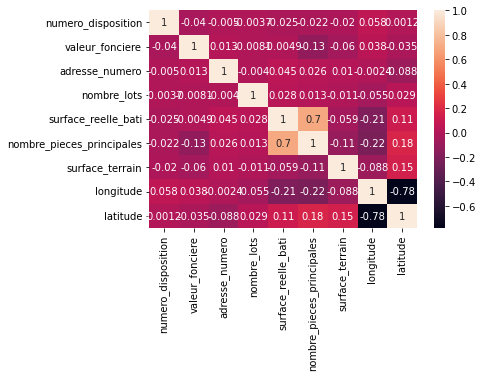

In [1029]:
sns.heatmap(df1.corr(), annot=True)

In [1030]:
df1['annee_mutation'] = df1['date_mutation'].apply(lambda x: x.split('-')[0])
df1['annee_mutation']= df1['annee_mutation'].astype(int)
df1 = df1.drop(['date_mutation'], axis=1)

In [1031]:
code = {'Vente': 0,
        'Adjudication': 1,
        'Vente en l\'état futur d\'achèvement': 2,
        'S':0,
        'AG':1,
        'J':2,
        'L':3,
        'AB':4,
        '1':1,
        '2':2,
        '000AB': 0, '000AC': 1, '000AD': 2, '000AE': 3, '000AH': 4, '000AI': 5, '000AK': 6, '000AO': 7, '000AP': 8,
        '000AR': 9, '000AS': 10, '000AT': 11, '000AV': 12, '000AW': 13, '000AX': 14, '000AY': 15, '000AZ': 16, '000BC': 17,
        '000BD': 18, '000BE': 19, '000BH': 20, '000BK': 21, '000BL': 22, '000BM': 23, '000BO': 24, '000BP': 25, '000BR': 26,
        '000BS': 27, '000BT': 28, '000BV': 29, '000BW': 30
       }

for col in df1.select_dtypes('object'):
    df1[col] = df1[col].map(code)

array([[<AxesSubplot:title={'center':'numero_disposition'}>,
        <AxesSubplot:title={'center':'nature_mutation'}>,
        <AxesSubplot:title={'center':'valeur_fonciere'}>,
        <AxesSubplot:title={'center':'adresse_numero'}>],
       [<AxesSubplot:title={'center':'nombre_lots'}>,
        <AxesSubplot:title={'center':'code_type_local'}>,
        <AxesSubplot:title={'center':'surface_reelle_bati'}>,
        <AxesSubplot:title={'center':'nombre_pieces_principales'}>],
       [<AxesSubplot:title={'center':'code_nature_culture'}>,
        <AxesSubplot:title={'center':'surface_terrain'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'section_prefixe'}>,
        <AxesSubplot:title={'center':'annee_mutation'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

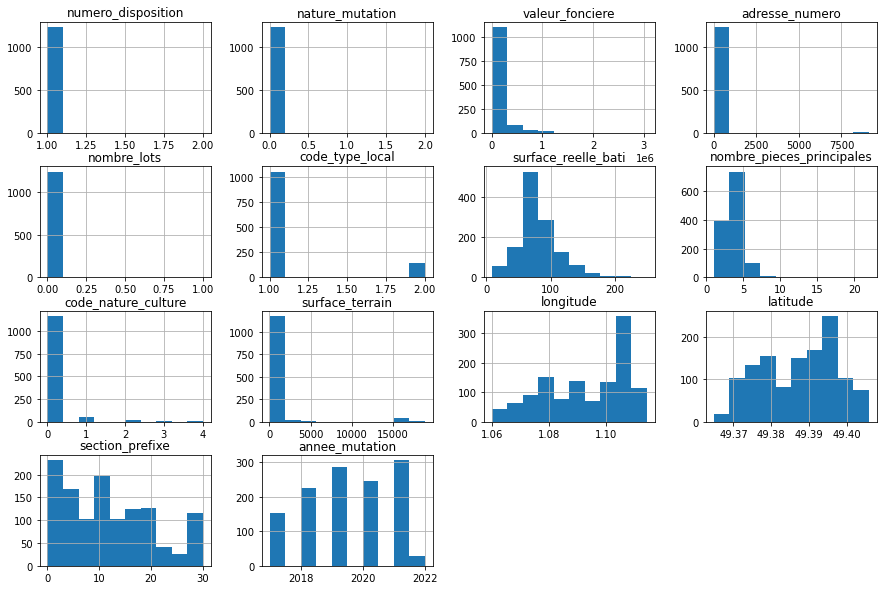

In [1032]:
#print(df1['section_prefixe'].unique())
df1.hist(figsize=(15,10))

In [1033]:

display(df1)

,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,surface_terrain,longitude,latitude,section_prefixe,annee_mutation
0,1,0,260000.0,26.0,0,1.0,129.0,4.0,0,351.0,1.071855,49.401886,0,2022
2,1,0,160000.0,13.0,0,1.0,64.0,4.0,0,452.0,1.070963,49.402764,0,2021
3,1,0,174000.0,21.0,0,1.0,64.0,4.0,0,498.0,1.070475,49.403622,0,2021
5,1,0,200000.0,2.0,0,2.0,18.0,1.0,0,105.0,1.074902,49.403036,0,2020
7,1,0,180000.0,28.0,0,1.0,108.0,5.0,0,348.0,1.071647,49.401956,0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,1,0,145000.0,27.0,0,1.0,74.0,5.0,0,374.0,1.072432,49.400659,29,2017
2949,1,0,262500.0,5.0,0,1.0,102.0,5.0,0,434.0,1.069653,49.399310,29,2017
2950,1,0,130000.0,25.0,0,1.0,64.0,4.0,0,369.0,1.072534,49.400600,29,2017
2951,1,0,189300.0,20.0,0,1.0,80.0,4.0,0,354.0,1.071759,49.399769,29,2017


<AxesSubplot:>

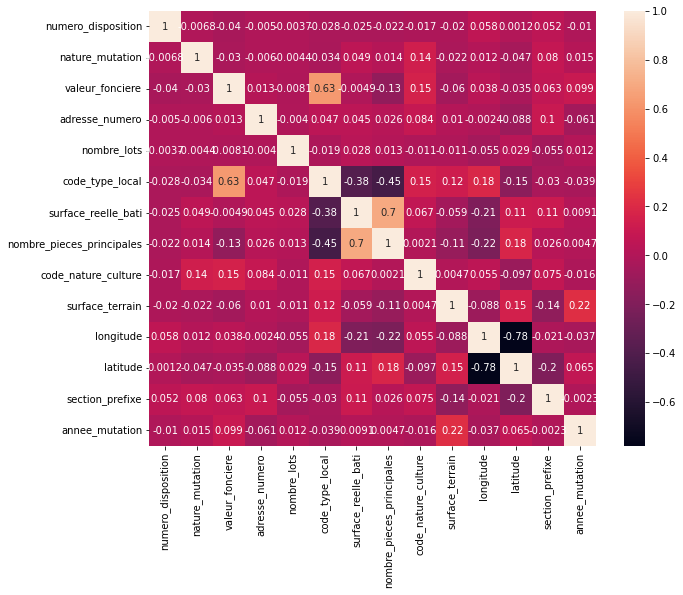

In [1034]:
ig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, ax=ax)


In [1035]:
df_mai = df1[df1['code_type_local'] == 1]
df_app = df1[df1['code_type_local'] == 2]
  


<AxesSubplot:>

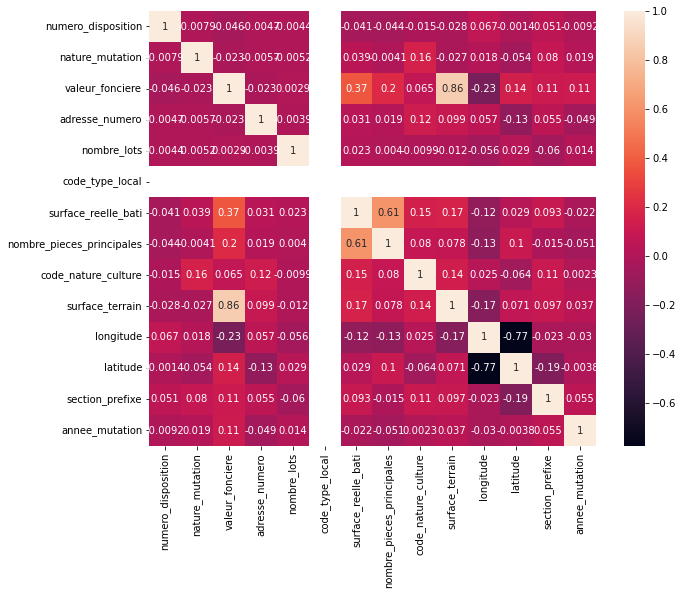

In [1036]:
ig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_mai.corr(), annot=True, ax=ax)


In [1037]:
df_mai = df_mai.drop(columns=['numero_disposition','nature_mutation','adresse_numero','nombre_lots','code_type_local','code_nature_culture'], axis=1)

<AxesSubplot:>

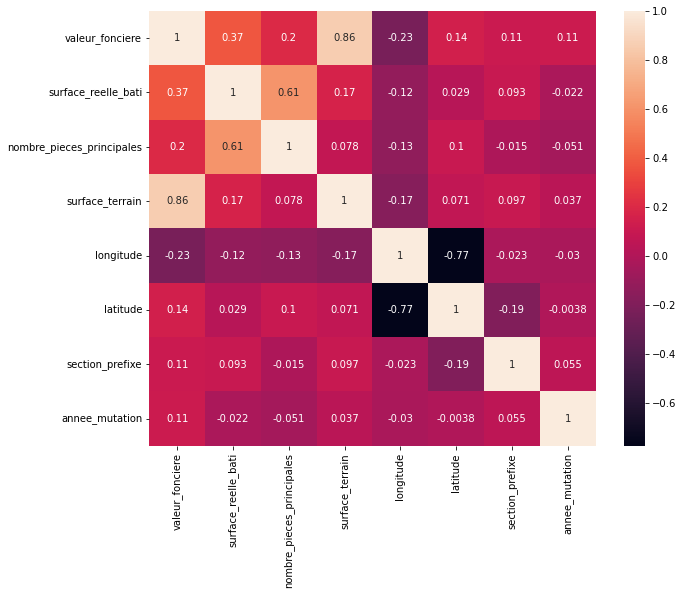

In [1038]:
ig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_mai.corr(), annot=True, ax=ax)


<AxesSubplot:>

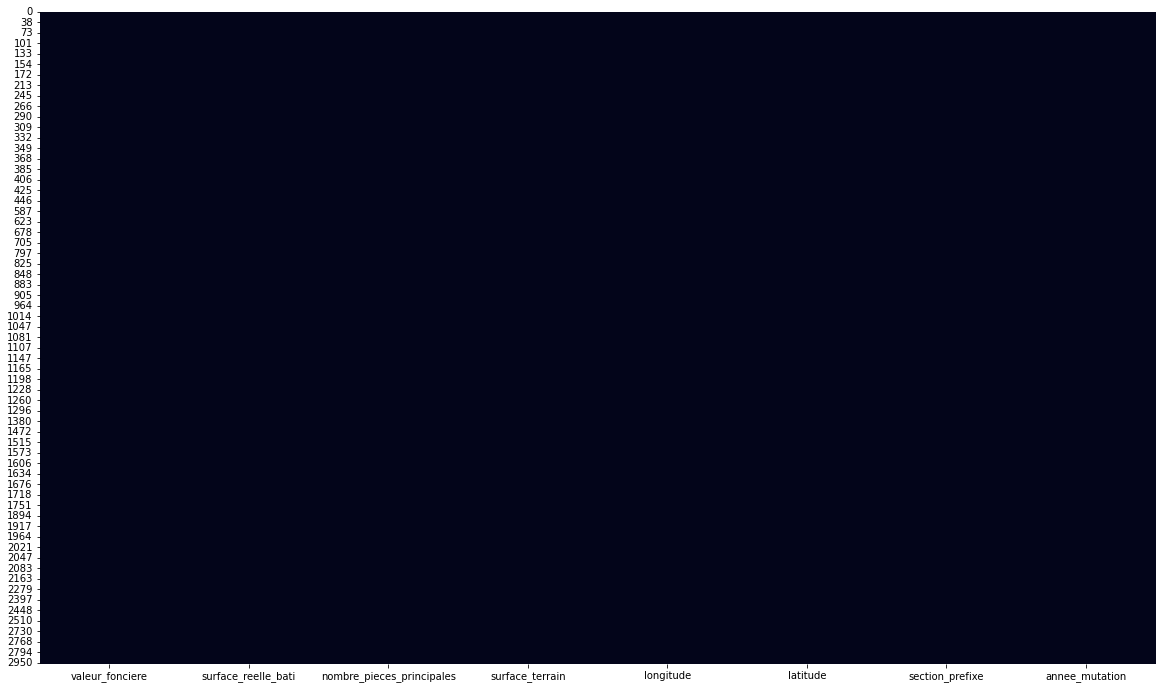

In [1039]:
plt.figure(figsize=(20,12))
sns.heatmap(df_mai.isna(), cbar=False)

<AxesSubplot:>

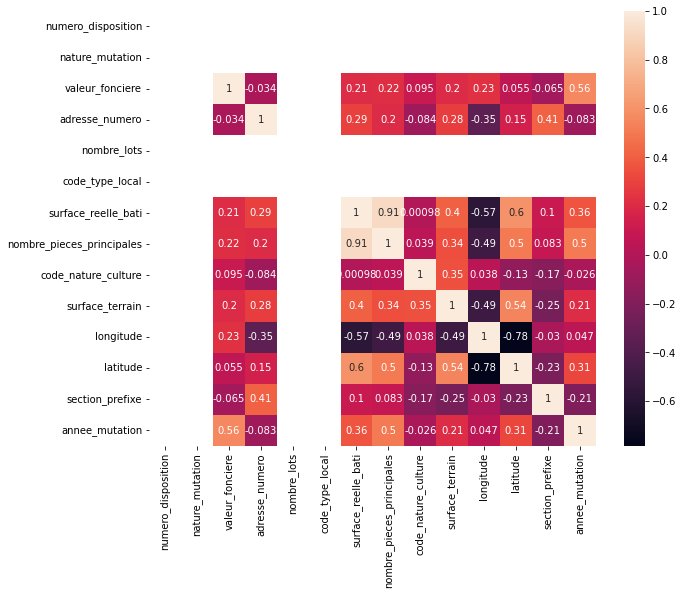

In [1040]:
ig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_app.corr(), annot=True, ax=ax)

In [1041]:
df_app = df_app.drop(columns=['numero_disposition','code_type_local','nature_mutation','nombre_lots','adresse_numero','code_nature_culture'], axis=1)

<AxesSubplot:>

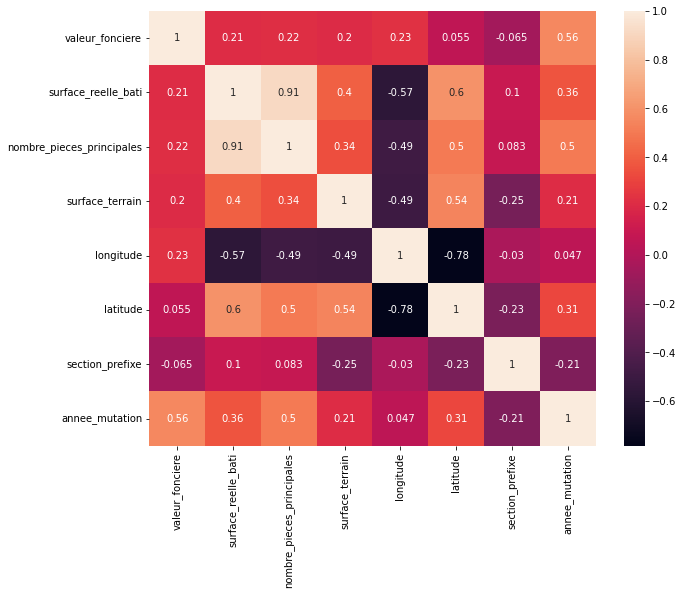

In [1042]:
ig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_app.corr(), annot=True, ax=ax)

# Implémentation des modéles

## Modéle pour les Maisons

In [1043]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline  import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = df_mai.drop(columns=['valeur_fonciere','longitude','latitude','annee_mutation'], axis=1)
y = df_mai['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Create a polynomial transformer
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#poly_features = PolynomialFeatures(degree=degree, include_bias = False)
reg_mai = LinearRegression()

reg_mai.fit(X_train_poly,y_train)

print(X_test)
print(y_test)

      surface_reelle_bati  nombre_pieces_principales  surface_terrain  \
1588                 56.0                        2.0            389.0   
1456                 88.0                        4.0            286.0   
1897                137.0                        5.0            403.0   
1560                100.0                        5.0             45.0   
1969                 85.0                        4.0            407.0   
...                   ...                        ...              ...   
426                  80.0                        5.0            244.0   
441                  92.0                        5.0            202.0   
2807                108.0                        6.0            424.0   
1717                 77.0                        3.0            134.0   
1092                 63.0                        4.0            328.0   

      section_prefixe  
1588               17  
1456               15  
1897               19  
1560               16  
196

In [1044]:
reg_mai.score(X_test_poly, y_test)

0.5317722426581231

In [1045]:
predictions = reg_mai.predict(X_test_poly)
predictions[0]

135926.55308883425

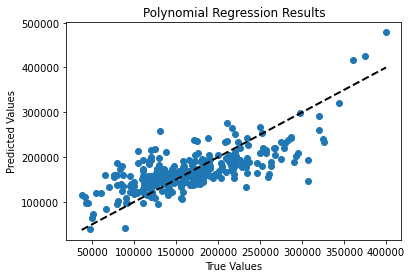

In [1046]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression Results')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

In [1047]:
scores = cross_val_score(reg_mai, X_test_poly, y_test, cv=5)

In [1048]:
print(np.mean(scores))

0.5193466890457061


In [1049]:
print(reg_mai.coef_)

[ 0.00000000e+00  1.27386205e+03  2.23006261e+04  1.22695527e+02
 -1.37449770e+02 -9.93343471e+01  7.43381330e-01  7.16164275e-01
 -3.65235140e+01 -2.17315953e+02  2.80861291e+00]


In [1050]:
print(reg_mai.intercept_)

-13922.369278165308


In [1052]:
calcul_equation_maison(50, 3, 95, 9)

101633.99617065399

## Modéle pour les Appartement

In [1223]:
X = df_app.drop(columns=['valeur_fonciere','longitude','latitude','annee_mutation'], axis=1)
y = df_app['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Create a polynomial transformer
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#poly_features = PolynomialFeatures(degree=degree, include_bias = False)
reg_app = LinearRegression()

reg_app.fit(X_train_poly,y_train)
print(X_test)
print(y_test)

      surface_reelle_bati  nombre_pieces_principales  surface_terrain  \
647                  60.0                        3.0           1090.0   
1020                 23.0                        1.0            245.0   
512                  73.0                        4.0           2232.0   
1466                 60.0                        2.0            362.0   
929                  22.0                        1.0            116.0   
19                   89.0                        3.0            767.0   
510                  60.0                        3.0            386.0   
1392                 56.0                        2.0            223.0   
642                  32.0                        1.0           1090.0   
1318                 80.0                        4.0            458.0   
924                  22.0                        1.0            500.0   
1064                 28.0                        1.0            223.0   
1067                 28.0                        1.

In [1214]:
reg_app.score(X_test_poly, y_test)

0.3059881521838642

In [1226]:
reg_app.predict(X_test_poly)[2]

522845.244206611

In [1217]:
print(reg_app.coef_)
print(reg_app.intercept_)

[ 0.00000000e+00  8.26970326e+03  3.21642464e+05  2.54519530e+02
  1.73528223e+04 -3.09132103e+03  1.97105670e+00 -3.83197257e+02
 -1.25830078e+02 -3.34302865e+02  5.69821496e+00]
-234383.09085176938


In [1221]:
coef = [  0.00000000e+00,  8.26970326e+03, 3.21642464e+05,  2.54519530e+02,
  1.73528223e+04, -3.09132103e+03 , 1.97105670e+00, -3.83197257e+02,
 -1.25830078e+02, -3.34302865e+02 , 5.69821496e+00]
intercept = -234383.09085176938
def calcul_equation_app(x1, x2, x3, x4):
    equation = intercept + coef[1]*x1 + coef[2]*x2 + coef[3]*x3 + coef[4]*x4 + coef[5]*x1*x2 + coef[6]*x1*x3+ coef[7]*x1*x4 + coef[8]*x2*x3 + coef[9]*x2*x4+ coef[10]*x3*x4
    
    return equation

In [1227]:
calcul_equation_app(73, 4, 2232,5)

522845.24576403084